In [36]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
dataset = pd.read_csv(r'C:\Users\Akanksha Kashyap\Downloads\star_classification.csv')

print(dataset.shape)

print(dataset.head())

(100000, 18)
         obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GA

In [3]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [4]:
dataset['class'].head(20)

0     GALAXY
1     GALAXY
2     GALAXY
3     GALAXY
4     GALAXY
5        QSO
6        QSO
7     GALAXY
8     GALAXY
9       STAR
10    GALAXY
11    GALAXY
12      STAR
13    GALAXY
14    GALAXY
15    GALAXY
16      STAR
17       QSO
18      STAR
19    GALAXY
Name: class, dtype: object

In [5]:
dataset['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [6]:
dataset['class_encoded'] = dataset['class'].replace({'STAR': 1, 'GALAXY': 2, 'QSO': 3})

dataset['class_encoded'].head(20)

dataset = dataset.drop(columns=['class'])

print(dataset.head(10))

         obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   
5  1.237680e+18  340.995121  20.589476  23.48827  23.33776  21.32195   
6  1.237679e+18   23.234926  11.418188  21.46973  21.17624  20.92829   
7  1.237679e+18    5.433176  12.065186  22.24979  22.02172  20.34126   
8  1.237661e+18  200.290475  47.199402  24.40286  22.35669  20.61032   
9  1.237671e+18   39.149691  28.102842  21.74669  20.03493  19.17553   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       

C:\Users\Akanksha Kashyap\AppData\Local\Temp\ipykernel_13020\144034046.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['class_encoded'] = dataset['class'].replace({'STAR': 1, 'GALAXY': 2, 'QSO': 3})


In [7]:
missing_values = dataset.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
obj_ID           0
alpha            0
delta            0
u                0
g                0
r                0
i                0
z                0
run_ID           0
rerun_ID         0
cam_col          0
field_ID         0
spec_obj_ID      0
redshift         0
plate            0
MJD              0
fiber_ID         0
class_encoded    0
dtype: int64


In [8]:
dataset.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class_encoded
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740,1.973670
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404,0.636287
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000,2.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000,2.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000,2.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000,3.000000


In [9]:
dataset2 = dataset.copy()

In [10]:
dataset2.head()
print(dataset2.shape)

(100000, 18)


In [11]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   obj_ID         100000 non-null  float64
 1   alpha          100000 non-null  float64
 2   delta          100000 non-null  float64
 3   u              100000 non-null  float64
 4   g              100000 non-null  float64
 5   r              100000 non-null  float64
 6   i              100000 non-null  float64
 7   z              100000 non-null  float64
 8   run_ID         100000 non-null  int64  
 9   rerun_ID       100000 non-null  int64  
 10  cam_col        100000 non-null  int64  
 11  field_ID       100000 non-null  int64  
 12  spec_obj_ID    100000 non-null  float64
 13  redshift       100000 non-null  float64
 14  plate          100000 non-null  int64  
 15  MJD            100000 non-null  int64  
 16  fiber_ID       100000 non-null  int64  
 17  class_encoded  100000 non-null

In [12]:
print(dataset2.columns.tolist())

['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift', 'plate', 'MJD', 'fiber_ID', 'class_encoded']


In [13]:

dataset2.drop(columns=[
                    'obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 
                    'field_ID', 'spec_obj_ID', 'plate', 'MJD', 'fiber_ID'], inplace=True)



In [14]:
dataset2.head()

,alpha,delta,u,g,r,i,z,redshift,class_encoded
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,2
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,2
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,2
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,2
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,2


In [15]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   alpha          100000 non-null  float64
 1   delta          100000 non-null  float64
 2   u              100000 non-null  float64
 3   g              100000 non-null  float64
 4   r              100000 non-null  float64
 5   i              100000 non-null  float64
 6   z              100000 non-null  float64
 7   redshift       100000 non-null  float64
 8   class_encoded  100000 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 6.9 MB


In [16]:
print("u min:", dataset2['u'].min())
print("g min:", dataset2['g'].min())
print("z min:", dataset2['z'].min())

print("u min:", dataset2['u'].max())
print("g min:", dataset2['g'].max())
print("z min:", dataset2['z'].max())


u min: -9999.0
g min: -9999.0
z min: -9999.0
u min: 32.78139
g min: 31.60224
z min: 29.38374


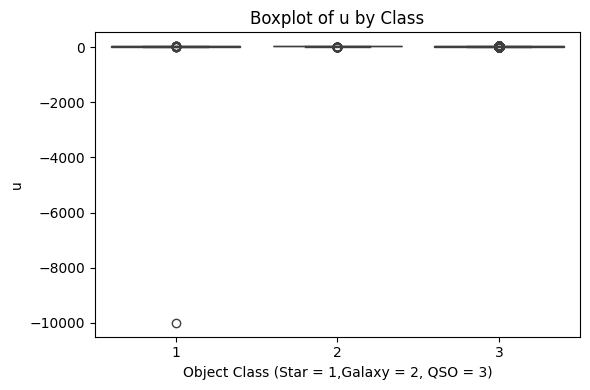

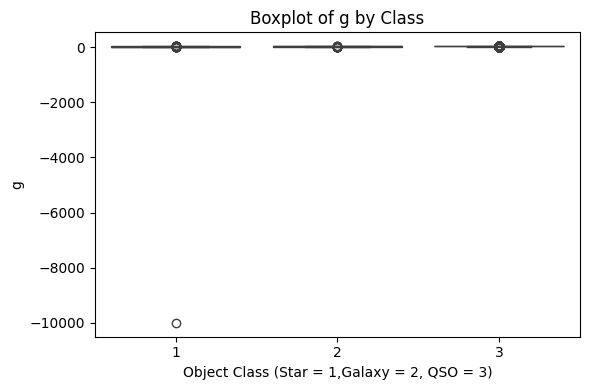

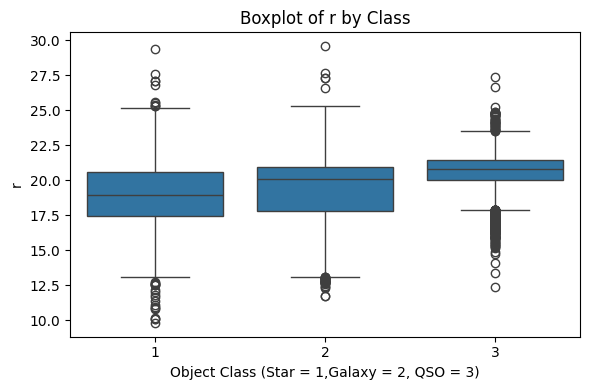

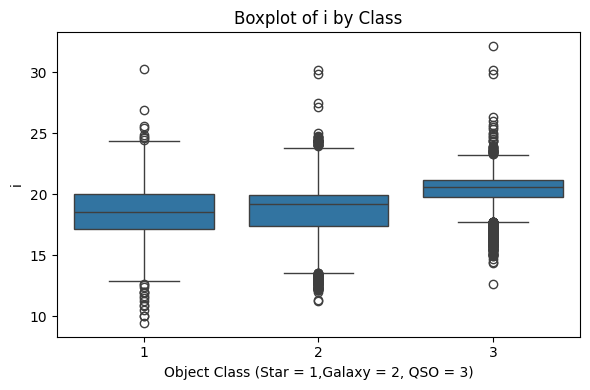

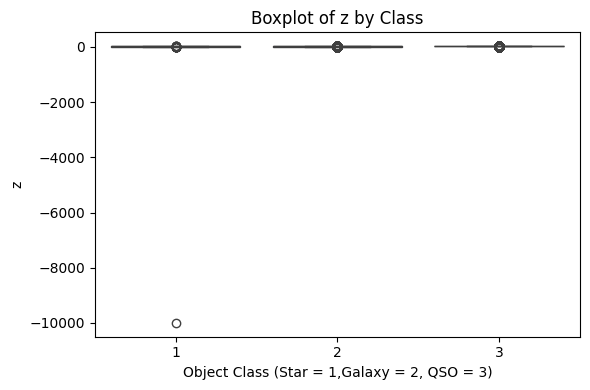

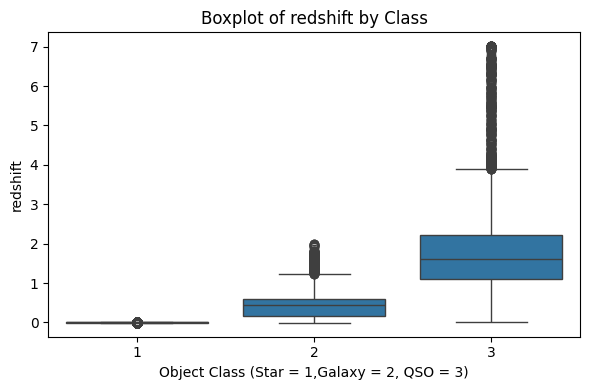

In [17]:
# plotting a boxplot for each feature by class

features = ['u', 'g', 'r', 'i', 'z', 'redshift']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=dataset2['class_encoded'], y=dataset2[feature])
    plt.title(f'Boxplot of {feature} by Class')
    plt.xlabel('Object Class (Star = 1,Galaxy = 2, QSO = 3)')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show() 


Text(0.5, 0, 'Object Class (Star = 1,Galaxy = 2, QSO = 3)')

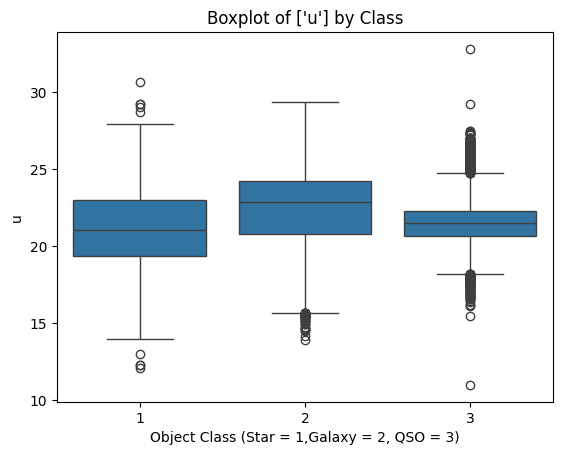

In [18]:
feature = ['u']
sns.boxplot(x='class_encoded', y='u', data=dataset2[dataset2['u'] > 0])  # Clip negatives
plt.title(f'Boxplot of {feature} by Class')
plt.xlabel('Object Class (Star = 1,Galaxy = 2, QSO = 3)')

In [19]:
dataset2.dropna(inplace=True)

In [20]:
dataset2 = dataset2[dataset2['u'] != -9999.0]

print("u min:", dataset2['u'].min())
print("u max:", dataset2['u'].max())


u min: 10.99623
u max: 32.78139


In [21]:
dataset2 = dataset2[dataset2['g'] != -9999.0]

print("g min:", dataset2['g'].min())
print("g max:", dataset2['g'].max())


g min: 10.4982
g max: 31.60224


In [22]:
dataset2 = dataset2[dataset2['z'] != -9999.0]

print("z min:", dataset2['z'].min())
print("z max:", dataset2['z'].max())


z min: 9.612333
z max: 29.38374


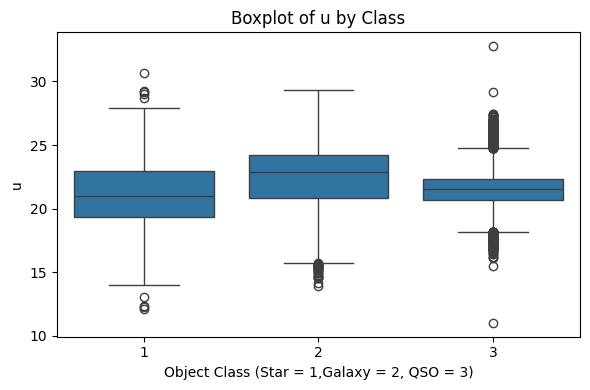

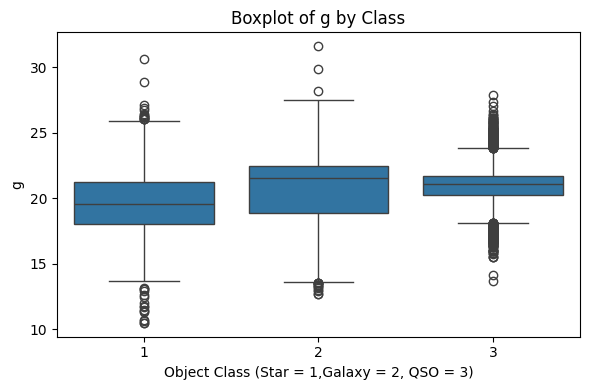

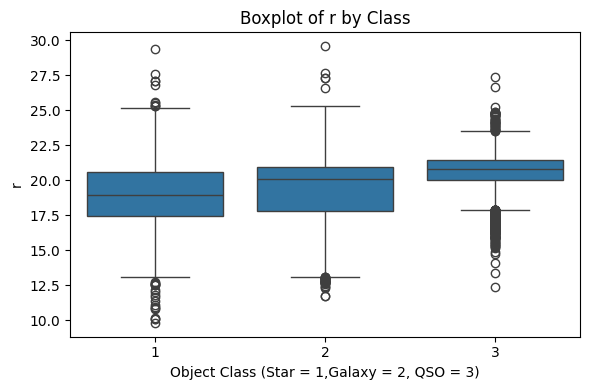

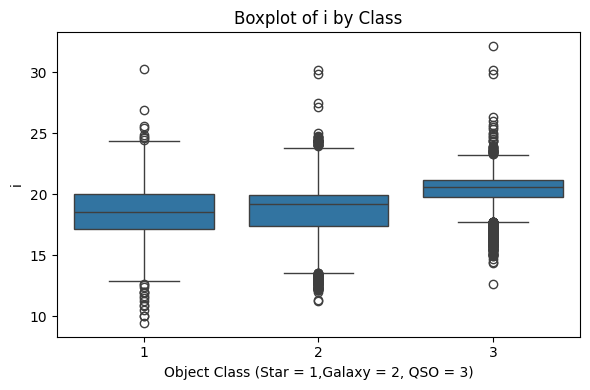

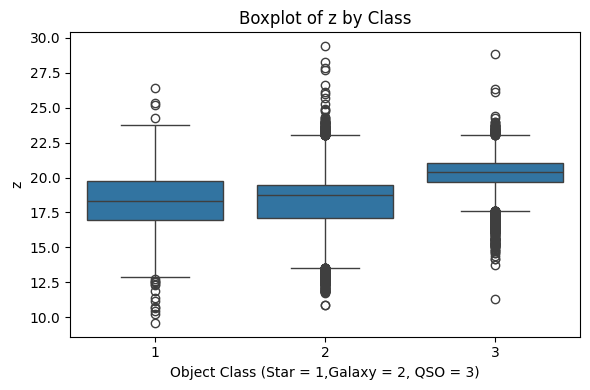

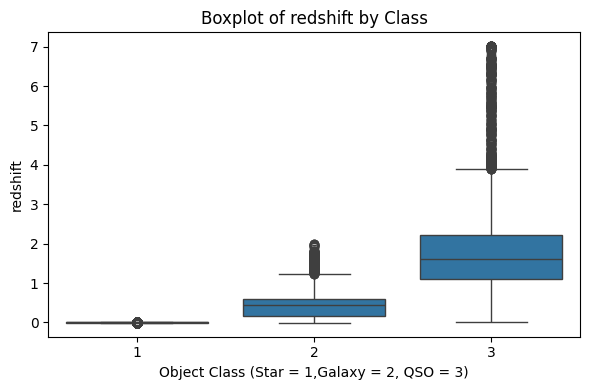

In [23]:
# plotting a boxplot for each feature by class

features = ['u', 'g', 'r', 'i', 'z', 'redshift']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=dataset2['class_encoded'], y=dataset2[feature])
    plt.title(f'Boxplot of {feature} by Class')
    plt.xlabel('Object Class (Star = 1,Galaxy = 2, QSO = 3)')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show() 

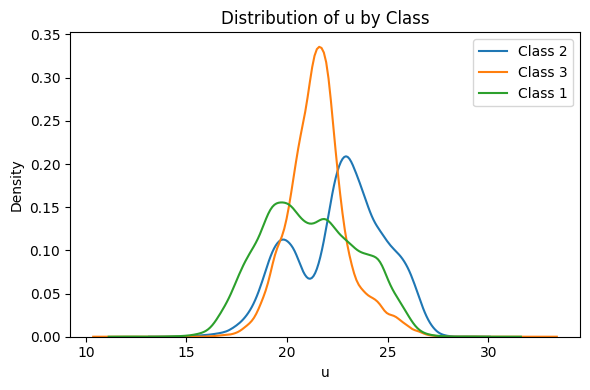

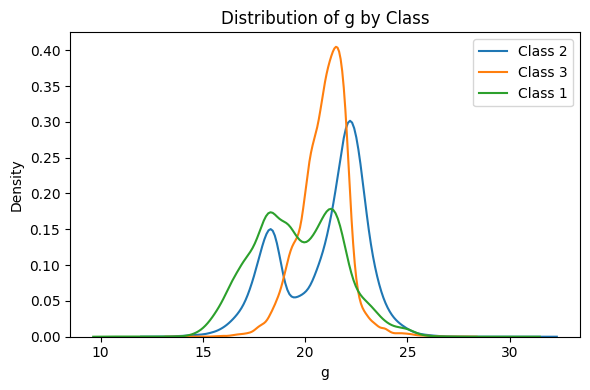

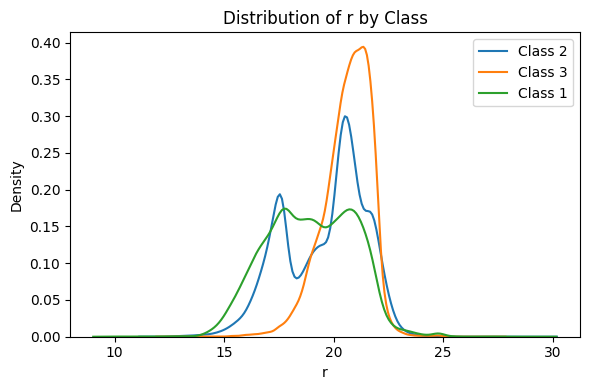

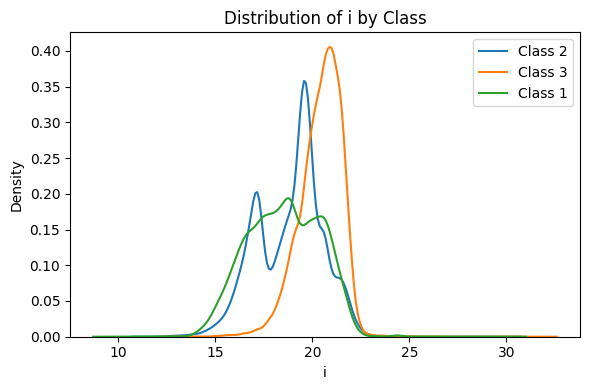

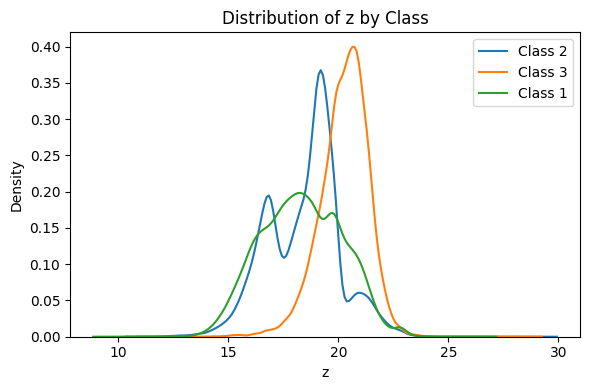

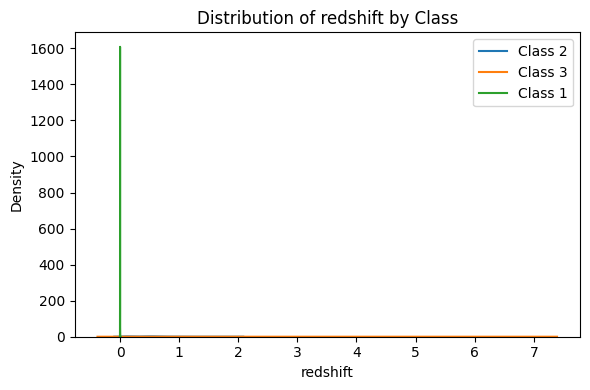

In [24]:
for feature in features:
    plt.figure(figsize=(6, 4))
    for label in dataset2['class_encoded'].unique():
        sns.kdeplot(dataset2[dataset2['class_encoded'] == label][feature], label=f'Class {label}')
    plt.title(f'Distribution of {feature} by Class')
    plt.xlabel(feature)
    plt.legend()
    plt.tight_layout()
    plt.show()

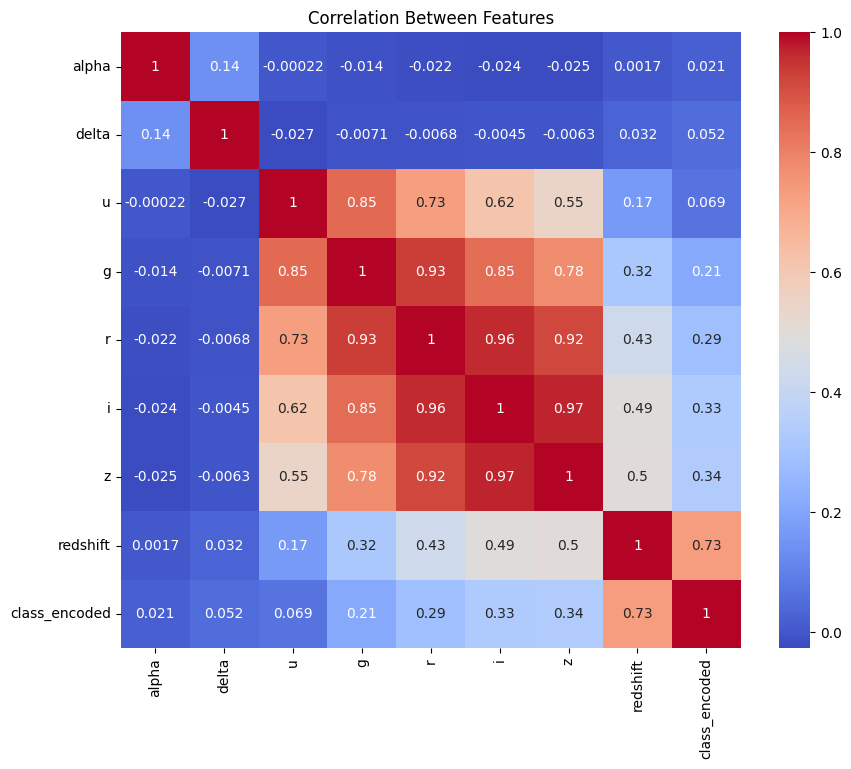

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(dataset2.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()

In [26]:
print("Minimum redshift:", dataset2['redshift'].min())
print("Maximum redshift:", dataset2['redshift'].max())

print((dataset2['redshift'] < 0).sum())



Minimum redshift: -0.009970667
Maximum redshift: 7.011245
13724


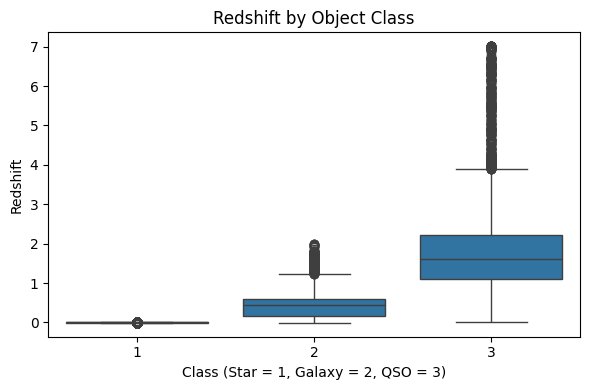

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(x='class_encoded', y='redshift', data=dataset2)
plt.title('Redshift by Object Class')
plt.xlabel('Class (Star = 1, Galaxy = 2, QSO = 3)')
plt.ylabel('Redshift')
plt.tight_layout()
plt.show()


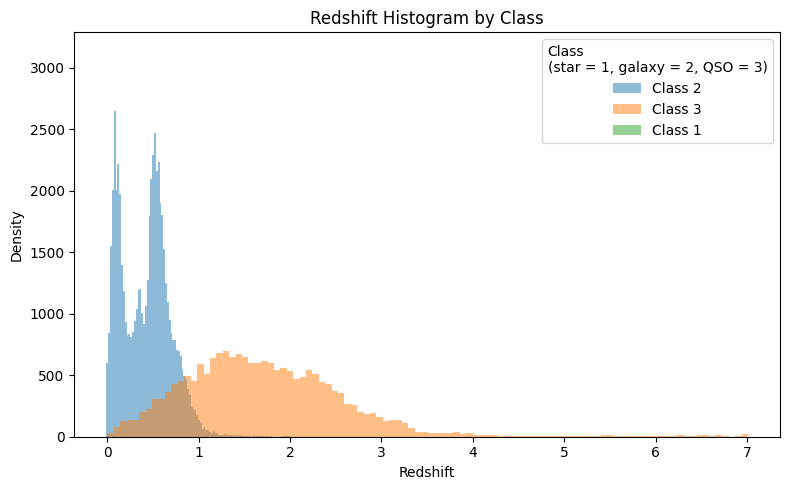

In [28]:
plt.figure(figsize=(8, 5))
for label in dataset2['class_encoded'].unique():
    subset = dataset2[dataset2['class_encoded'] == label]
    plt.hist(subset['redshift'], bins=100, alpha=0.5, label=f'Class {label}')

plt.title("Redshift Histogram by Class")
plt.xlabel("Redshift")
plt.ylabel("Density")
plt.legend(title="Class\n(star = 1, galaxy = 2, QSO = 3)")
plt.tight_layout()
plt.show()


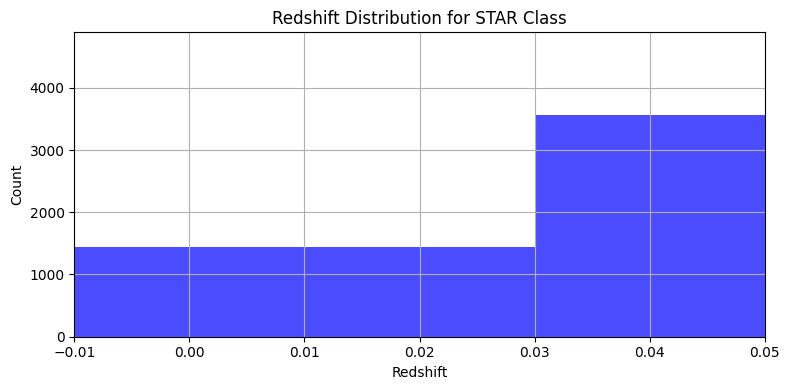

In [29]:
import matplotlib.pyplot as plt

# Filter STAR rows (class_encoded = 2)
star_data = dataset2[dataset2['class_encoded'] == 2]

# Plot histogram for STAR redshift
plt.figure(figsize=(8, 4))
plt.hist(star_data['redshift'], bins=50, color='blue', alpha=0.7)

plt.title("Redshift Distribution for STAR Class")
plt.xlabel("Redshift")
plt.ylabel("Count")
plt.xlim(-0.01, 0.05)  # Zoom in tightly to where STAR values actually lie
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
# X = all features, y = target
X = dataset2.drop(columns='class_encoded')
y = dataset2['class_encoded']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

print(X.info())
print(y.info())
print(X.head())
print(y.head())


Shape of X: (99999, 8)
Shape of y: (99999,)
<class 'pandas.core.frame.DataFrame'>
Index: 99999 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   alpha     99999 non-null  float64
 1   delta     99999 non-null  float64
 2   u         99999 non-null  float64
 3   g         99999 non-null  float64
 4   r         99999 non-null  float64
 5   i         99999 non-null  float64
 6   z         99999 non-null  float64
 7   redshift  99999 non-null  float64
dtypes: float64(8)
memory usage: 6.9 MB
None
<class 'pandas.core.series.Series'>
Index: 99999 entries, 0 to 99999
Series name: class_encoded
Non-Null Count  Dtype
--------------  -----
99999 non-null  int64
dtypes: int64(1)
memory usage: 1.5 MB
None
        alpha      delta         u         g         r         i         z  \
0  135.689107  32.494632  23.87882  22.27530  20.39501  19.16573  18.79371   
1  144.826101  31.274185  24.77759  22.83188  22.58444  2

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [32]:
print("Original class distribution:\n", y.value_counts(normalize=True))
print("Train distribution:\n", y_train.value_counts(normalize=True))
print("Test distribution:\n", y_test.value_counts(normalize=True))


Original class distribution:
 class_encoded
2    0.594456
1    0.215932
3    0.189612
Name: proportion, dtype: float64
Train distribution:
 class_encoded
2    0.594457
1    0.215928
3    0.189615
Name: proportion, dtype: float64
Test distribution:
 class_encoded
2    0.59445
1    0.21595
3    0.18960
Name: proportion, dtype: float64


In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler

standard_cols = ['u', 'g', 'r', 'i', 'z', 'alpha', 'delta']
robust_cols = ['redshift']

preprocessor = ColumnTransformer([
    ('std', StandardScaler(), standard_cols),
    ('rob', RobustScaler(), robust_cols)
])

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)


In [34]:
# Combine column names from both scalers
scaled_columns = standard_cols + robust_cols

# Create a DataFrame from the scaled training data
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=scaled_columns)

# Show first few rows
X_train_scaled_df.head()

,u,g,r,i,z,alpha,delta,redshift
0,-1.070052,-1.219367,-1.149278,-1.033027,-0.916257,0.778939,0.477144,-0.655706
1,-1.706001,-1.617834,-1.362495,-1.165823,-0.989598,0.782688,0.773085,-0.656850
2,-0.532635,0.231187,0.586973,0.884468,1.248835,-0.241991,0.711553,1.476931
3,-0.637840,-0.685928,-0.492548,-0.325444,-0.189810,-0.759229,0.195281,-0.655384
4,1.878300,0.505801,0.327175,0.175060,0.205463,0.376794,0.991284,0.157122


In [35]:
print("Original values:\n", X_train.iloc[0])
print("\nScaled values:\n", X_train_scaled_df.iloc[0])


Original values:
 alpha       252.907014
delta        33.577334
u            19.677900
g            18.154180
r            17.518930
i            17.272930
z            17.154420
redshift     -0.000008
Name: 44934, dtype: float64

Scaled values:
 u          -1.070052
g          -1.219367
r          -1.149278
i          -1.033027
z          -0.916257
alpha       0.778939
delta       0.477144
redshift   -0.655706
Name: 0, dtype: float64


Decision Tree Accuracy: 0.96635

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      4319
           2       0.97      0.97      0.97     11889
           3       0.91      0.92      0.92      3792

    accuracy                           0.97     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.97      0.97      0.97     20000



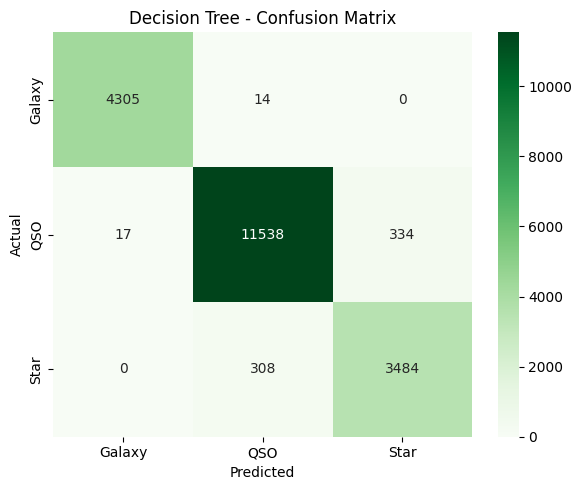

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Initialize and train the decision tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# 2. Predict
y_pred_dt = dt_model.predict(X_test_scaled)

# 3. Performance Evaluation 
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# 4. Confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Greens', xticklabels=['Galaxy', 'QSO', 'Star'], yticklabels=['Galaxy', 'QSO', 'Star'])
plt.title('Decision Tree - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


Decision Tree Accuracy: 0.9738

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      4319
           2       0.97      0.98      0.98     11889
           3       0.94      0.92      0.93      3792

    accuracy                           0.97     20000
   macro avg       0.97      0.97      0.97     20000
weighted avg       0.97      0.97      0.97     20000



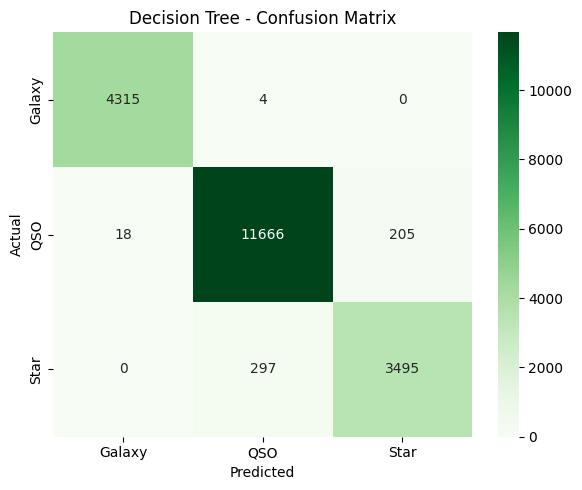

In [45]:
# 1. Initialize and train the decision tree
dt_model = DecisionTreeClassifier(
    criterion='gini', 
    max_depth=8,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42)
dt_model.fit(X_train_scaled, y_train)

# 2. Predict
y_pred_dt = dt_model.predict(X_test_scaled)

# 3. Performance Evaluation 
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# 4. Confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Greens', xticklabels=['Galaxy', 'QSO', 'Star'], yticklabels=['Galaxy', 'QSO', 'Star'])
plt.title('Decision Tree - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

Random Forest Accuracy: 0.97685

Classification Report:
               precision    recall  f1-score   support

           1       0.99      1.00      0.99      4319
           2       0.98      0.98      0.98     11889
           3       0.96      0.93      0.94      3792

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000



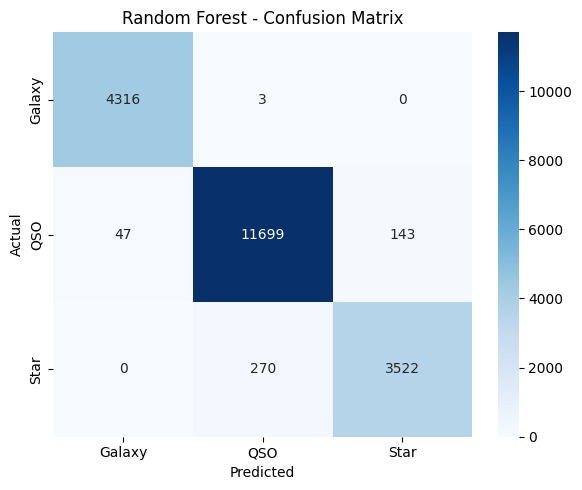

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,         # More trees = better generalization (to a point)
    max_depth=12,             # Limit depth to reduce overfitting
    min_samples_split=10,     # Avoid tiny branches
    min_samples_leaf=5,       # Avoid overfitting to noise
    max_features='sqrt',      # Default — randomly pick features per tree
    bootstrap=True,    
    random_state=42 
    )

rf_model.fit(X_train_scaled, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Galaxy', 'QSO', 'Star'],
            yticklabels=['Galaxy', 'QSO', 'Star'])
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Try a few k values and track accuracy
k_values = list(range(1, 16))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_knn = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred_knn)
    accuracies.append(acc)
    print(f"k = {k} → Accuracy = {acc:.4f}")


k = 1 → Accuracy = 0.9347
k = 2 → Accuracy = 0.9398
k = 3 → Accuracy = 0.9428
k = 4 → Accuracy = 0.9440
k = 5 → Accuracy = 0.9428
k = 6 → Accuracy = 0.9432
k = 7 → Accuracy = 0.9415
k = 8 → Accuracy = 0.9420
k = 9 → Accuracy = 0.9406
k = 10 → Accuracy = 0.9403
k = 11 → Accuracy = 0.9385
k = 12 → Accuracy = 0.9395
k = 13 → Accuracy = 0.9375
k = 14 → Accuracy = 0.9377
k = 15 → Accuracy = 0.9366


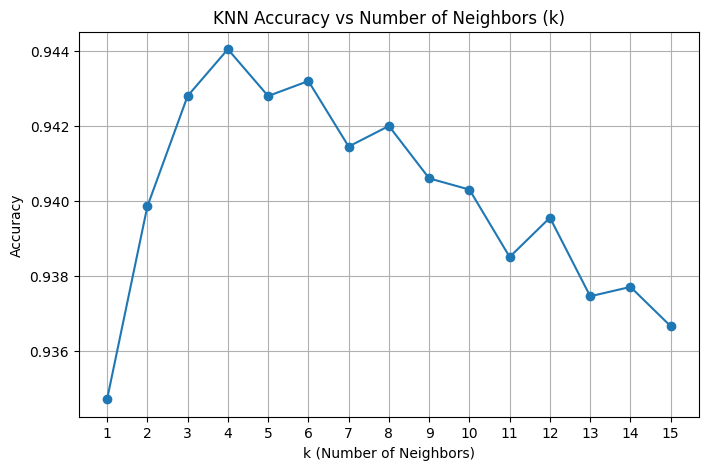

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title("KNN Accuracy vs Number of Neighbors (k)")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(k_values)
plt.show()


              precision    recall  f1-score   support

           1       0.89      0.96      0.92      4319
           2       0.96      0.95      0.95     11889
           3       0.97      0.91      0.94      3792

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.95      0.94      0.94     20000



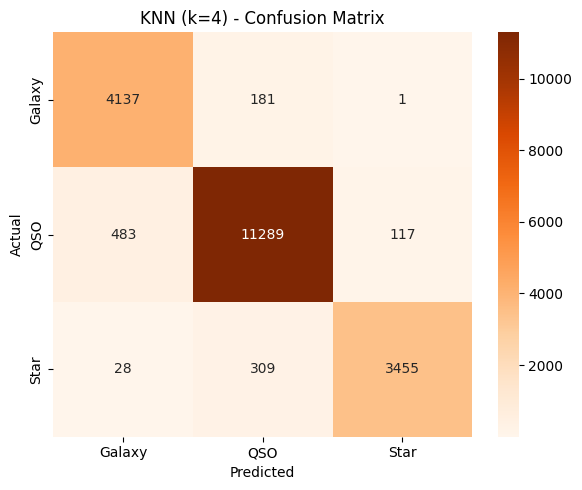

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Final KNN model with best k 
best_k = 4  
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Evaluation
print(classification_report(y_test, y_pred_knn))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Galaxy', 'QSO', 'Star'],
            yticklabels=['Galaxy', 'QSO', 'Star'])
plt.title(f'KNN (k={best_k}) - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()
